<a href="https://colab.research.google.com/github/modichirag/flowpm/blob/tfcosmo/notebooks/my_flowpm_blog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --quiet  git+https://github.com/modichirag/flowpm.git@blogpost;
!git clone --quiet -b blogpost https://github.com/modichirag/flowpm.git;

ERROR: Could not find a version that satisfies the requirement tensorflow<2.0.0 (from flowpm==0.1rc2.dev15+gdcddecd) (from versions: 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4)
ERROR: No matching distribution found for tensorflow<2.0.0 (from flowpm==0.1rc2.dev15+gdcddecd)
fatal: destination path 'flowpm' already exists and is not an empty directory.


In [1]:
%pylab inline
import tensorflow as tf
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline as iuspline
from flowpm.tfpower import linear_matter_power
from flowpm.tfbackground import cosmo

# You may need to adapt this path depending on where you are running the notebook
# This is the power spectrum of initial conditions
klin = np.loadtxt('/Users/dl264294/Desktop/github/flowpm/flowpm/data/Planck15_a1p00.txt').T[0]
plin=linear_matter_power(cosmo, klin)
ipklin = iuspline(klin, plin)


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Define key parameters of our Universe
a0      = 0.1       #the initial epoch from where we begin the evolution, a0=0 corresponds to birth but is numerically unstable
af      = 1.0       #final epoch where we visualize structures, af=1 corresponds to today
n_steps = 10        #number of time-steps to split the total evolution into
L       = 100       #Physical size of the Universe in Mpc/h
N       = 52        #Number of mesh-points along one axis, size of the cube. Then the number of particles will be N^3
batch   = 16         #Batch size, how many independent Universes to simulate

In [3]:
import flowpm
stages = np.linspace(a0, af, n_steps, endpoint=True) #time-steps for the integration

initial_conditions = flowpm.linear_field(N,          # size of the cube
                                         L,         # Physical size of the cube
                                         ipklin,      # Initial powerspectrum
                                         batch_size=16)
# Sample particles
state = flowpm.lpt_init(initial_conditions, a0)   

# Evolve particles down to z=0
final_state = flowpm.nbody(state, stages, 52)         

# Retrieve final density field
final_field = flowpm.cic_paint(tf.zeros_like(initial_conditions), final_state[0])

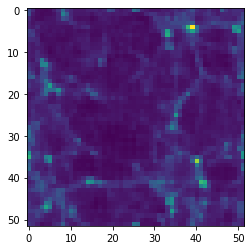

In [4]:
imshow(final_field[0].numpy().sum(axis=0))

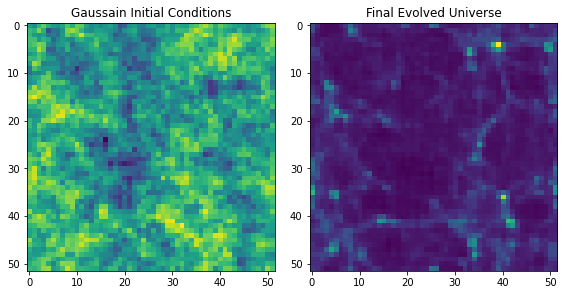

In [5]:
ib = 0  #index of the Universe in the batch

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(initial_conditions[ib].numpy().sum(axis=0))
ax[0].set_title('Gaussain Initial Conditions')
ax[1].imshow(final_field[ib].numpy().sum(axis=0))
ax[1].set_title('Final Evolved Universe')
plt.tight_layout()
plt.show()



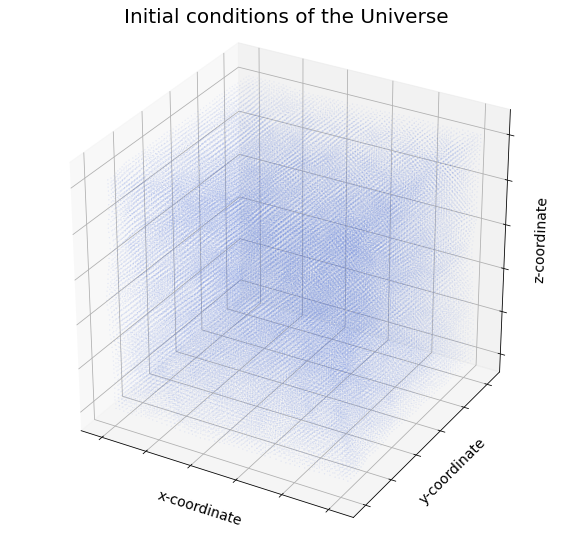

In [6]:
#Create figure
#Need to convert to physical coordinates
fig=plt.figure(figsize=(10,10))#Create 3D axes
try: ax=fig.add_subplot(111,projection="3d")
except : ax=Axes3D(fig) 
ax.scatter(state[0, 0,:,0],state[0, 0,:,1], state[0, 0,:,2],color="royalblue",marker=".",s=.02)
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Initial conditions of the Universe\n",fontsize=20)
#ax.legend(loc="upper left",fontsize=14)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
plt.savefig('3dinitial.png', dpi=1200)

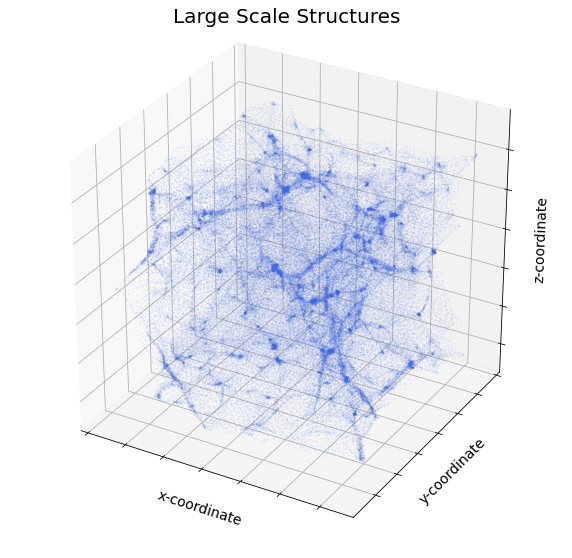

In [7]:
#Create figure
fig=plt.figure(figsize=(10,10))#Create 3D axes
try: ax=fig.add_subplot(111,projection="3d")
except : ax=Axes3D(fig) 
ax.scatter(final_state[0, 0,:,0],final_state[0, 0,:,1], final_state[0, 0,:,2],color="royalblue",marker=".",s=.02)
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Large Scale Structures\n",fontsize=20)
#ax.legend(loc="upper left",fontsize=14)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
plt.savefig('3dfinal.png', dpi=1200)